In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train_amazon.csv')

In [3]:
df

,Unnamed: 0,overall,verified,asin,style,reviewerName,reviewText,summary,description,title,rank,main_cat
0,4359171,5.0,True,B002TLT10I,{'Product Packaging:': ' Standard Packaging'},Catherine Hynes,Love these things. The supplied batteries wer...,Good headset Replaced batteries,"[""Wireless headphones come in many shapes and ...",Sennheiser RS 170 Digital Wireless Headphones ...,"['>#132,147 in Cell Phones & Accessories (See ...",Home Audio & Theater
1,3938786,5.0,True,B001UQ6E3K,{'Style:': ' 20-60x60'},rschoepke,"great value, good range and easy to use",Five Stars,['The 60 mm Waterproof UpClose Spotting Scope ...,Celestron 52229 60mm Refractor Zoom Spotting S...,"['>#20,943 in Camera & Photo (See Top 100 in C...",Camera & Photo
2,6176764,5.0,True,B005FYNSUA,{'Capacity:': ' 16 GB'},Carl,Smallest thumb drive ever! Can't beat the price,Five Stars,"[""With its low-profile design, the Cruzer Fit ...",SanDisk Cruzer Fit 8GB USB 2.0 Low-Profile Fla...,['>#326 in Computers & Accessories > Data Stor...,All Electronics
3,1546547,5.0,True,B0007ZFLYI,NaN,Scott W. Soyster,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,"[""When you rely on your notebook PC to communi...",Logitech Quickcam for Notebooks Deluxe,"['>#1,108 in Electronics &gt; Accessories &amp...",All Electronics
4,3178737,5.0,True,B0016JMS90,NaN,Dancer,I got this for my mom. She's not the most tec...,Good webcam,"['PC Webcam with Built-In Microphone', 'Add tr...",Logitech QuickCam Communicate MP (Black),['>#381 in Electronics > Accessories & Supplie...,All Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2375917,5.0,False,B000TV6X74,NaN,Owlyn,"I had e2c's, and the wires started to crack (t...",Great Company and Earbuds - Can't Beat Them fo...,['An excellent introduction into premium audio...,Shure SCL2 Sound Isolating Earphones with Sing...,"['>#273,762 in Musical Instruments (See Top 10...",Musical Instruments
49996,941649,5.0,True,B0000DIESU,{'Style:': ' Slim Cable - mobile'},David Aynes,Works great!!,Five Stars,"[""Features : EMI/RF Protection, Molded, Corros...",6in Stereo Splitter Cable - 3.5mm Male to 2x 3...,['>#229 in Electronics > Accessories & Supplie...,Home Audio & Theater
49997,5932155,4.0,True,B0058OU8VY,NaN,Michael Chimirev,I used it as an adapter for the keyboard that ...,"Which arguably makes it mostly useless, but th...",['Unifying receiver for mouse and keyboard wor...,Logitech C-U0007 Unifying receiver for mouse a...,['>#5 in Computers & Accessories > Networking ...,Computers
49998,211814,5.0,True,B00004ZCJJ,NaN,Michelle,This is a good overall protective lens. Used ...,Good protective lens,"['Tiffen UV Protection filter Film, as well as...",Tiffen 62mm UV Protection Filter,['>#17 in Camera & Photo > Camera & Photo Acce...,Camera & Photo


In [4]:
df_train = df[['reviewText','summary','overall']]
df_train.head()

,reviewText,summary,overall
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0
1,"great value, good range and easy to use",Five Stars,5.0
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0
4,I got this for my mom. She's not the most tec...,Good webcam,5.0


In [5]:
def classify(x):
    if x==5.0 or x==4.0:
        return 2
    elif x==3.0:
        return 1
    else:
        return 0

In [6]:
df_train['Sentiment']=df_train['overall'].apply(classify)
df_train['Sentiment'].value_counts()

<ipython-input-6-fbd87df84404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Sentiment']=df_train['overall'].apply(classify)


2    38439
0     7832
1     3729
Name: Sentiment, dtype: int64

In [7]:
df_train.head()

,reviewText,summary,overall,Sentiment
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2
1,"great value, good range and easy to use",Five Stars,5.0,2
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0,2
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2
4,I got this for my mom. She's not the most tec...,Good webcam,5.0,2


In [8]:
df_train.isnull().sum().value_counts()

0     2
16    1
3     1
dtype: int64

In [9]:
df_train['overall'].value_counts()

5.0    30010
4.0     8429
1.0     5222
3.0     3729
2.0     2610
Name: overall, dtype: int64

In [10]:
X=df_train.drop('overall',axis=1)

In [11]:
X.head(2)

,reviewText,summary,Sentiment
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,2
1,"great value, good range and easy to use",Five Stars,2


In [12]:
## Get the Dependent features
y=df_train['overall']

In [13]:
y.head(2)

0    5.0
1    5.0
Name: overall, dtype: float64

In [14]:
df_train.shape

(50000, 4)

In [15]:
df_train=df_train.dropna()

In [16]:
df_train.shape

(49981, 4)

In [17]:
messages=df_train.copy()

In [18]:
messages.head(10)

,reviewText,summary,overall,Sentiment
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2
1,"great value, good range and easy to use",Five Stars,5.0,2
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0,2
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2
4,I got this for my mom. She's not the most tec...,Good webcam,5.0,2
5,I usually don't pay attention to these reviews...,very disappointed,1.0,0
6,Loved item thank you,Five Stars,5.0,2
7,kids really have enjoyed this machine,Five Stars,5.0,2
8,I have this stupid 1600W Samsung microwave and...,exactly what I needed,5.0,2
9,the charge surge protector works great. just w...,need surge protection,4.0,2


In [19]:
messages.reset_index(inplace=True)

In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['reviewText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joyti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
corpus[6]

'love item thank'

In [22]:
df_train['reviewText'][3]

"I bought this webcam mostly because of the price, and the fact that it is a logitech, which is a pretty decent company.  One thing I really like about the webcam is that it is flat, and comes with a case to store it in when not in use.  It takes up less room than some of the round versions that I have seen.  My sister in law wanted one too, so I wound up buying two of these and I am very happy with it's results.\n\nI did read alot of the reviews prior to buying and installing the webcam on my computer.  I am running vista home premium, and I took the advice of others and went to Logitech's website and downloaded the drivers right from their site instead of using the install cd.  The newer driver is 11.5 and the cd (being from 2006) has version 10.5  Installing the drivers was easy and the rest of the install went well.\n\nI read some reviews of people having issued with windows crashing.  Ok, I had it happen once, and this is what I was doing.  I had yahoo messenger open and the webca

In [23]:
df_final=df_train.assign(cleaned_views=corpus)

In [24]:
df_final.head(2)

,reviewText,summary,overall,Sentiment,cleaned_views
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2,love thing suppli batteri dead replac
1,"great value, good range and easy to use",Five Stars,5.0,2,great valu good rang easi use


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob

In [26]:
df_final['Classes']=df_final['overall']
df_final['Classes'].replace({5.0 : "positive",4.0 : "positive",
                             3.0 : "neutral",2.0: "negative",
                             1.0 : "negative"},
                           inplace=True)

df_final['Classes'].value_counts()

positive    38422
negative     7831
neutral      3728
Name: Classes, dtype: int64

In [27]:
df_final.head()

,reviewText,summary,overall,Sentiment,cleaned_views,Classes
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2,love thing suppli batteri dead replac,positive
1,"great value, good range and easy to use",Five Stars,5.0,2,great valu good rang easi use,positive
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0,2,smallest thumb drive ever beat price,positive
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2,bought webcam mostli price fact logitech prett...,positive
4,I got this for my mom. She's not the most tec...,Good webcam,5.0,2,got mom tech savvi set problem one time nephew...,positive


In [28]:
Stopwords=set(STOPWORDS)

def word_cloud(data):
    wordcloud=WordCloud(
    background_color="black",
    max_font_size=40,
    max_words=200,
    stopwords=Stopwords
    ).generate(str(data))
    plt.figure(figsize=(15,10))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

Wordcloud for Neutral


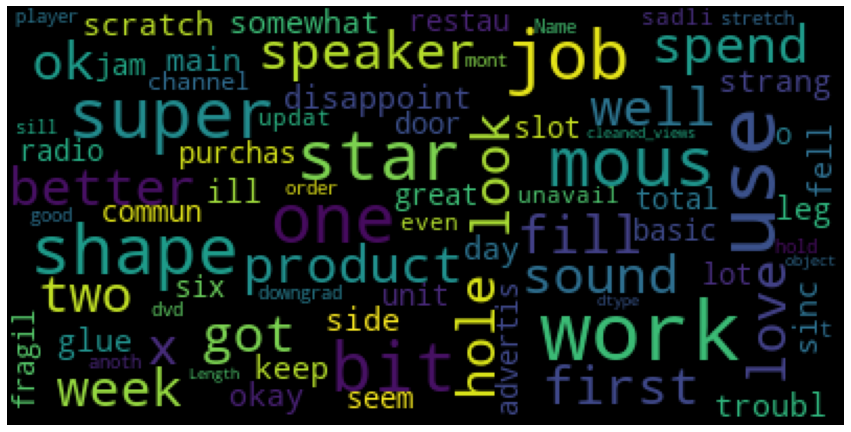

In [29]:
print("Wordcloud for Neutral")
word_cloud(df_final[df_final['Classes']=="neutral"]['cleaned_views'])

Wordcloud for Negative


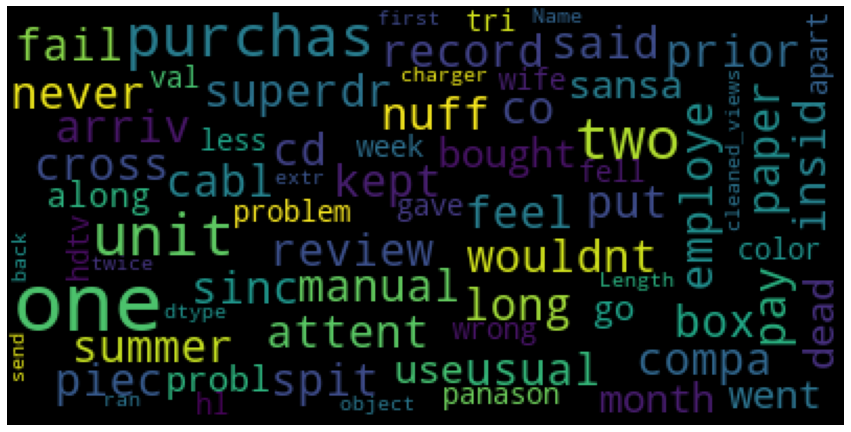

In [30]:
print("Wordcloud for Negative")
word_cloud(df_final[df_final['Classes']=="negative"]['cleaned_views'])

Wordcloud for Positive


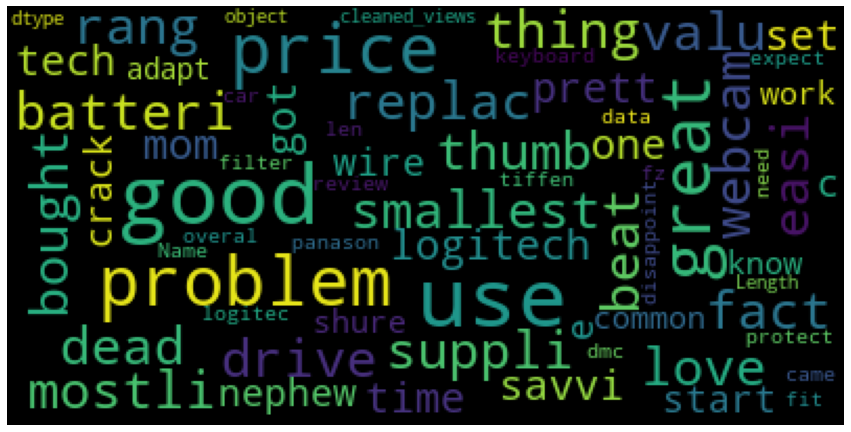

In [31]:
print("Wordcloud for Positive")
word_cloud(df_final[df_final['Classes']=="positive"]['cleaned_views'])


In [32]:
df_final['Polarity']=df_final['cleaned_views'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)

In [33]:
df_final.head()

,reviewText,summary,overall,Sentiment,cleaned_views,Classes,Polarity
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2,love thing suppli batteri dead replac,positive,0.150000
1,"great value, good range and easy to use",Five Stars,5.0,2,great valu good rang easi use,positive,0.750000
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0,2,smallest thumb drive ever beat price,positive,0.000000
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2,bought webcam mostli price fact logitech prett...,positive,0.155790
4,I got this for my mom. She's not the most tec...,Good webcam,5.0,2,got mom tech savvi set problem one time nephew...,positive,0.372619


In [34]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(df_final).toarray()

In [35]:
df_final.head(2)

,reviewText,summary,overall,Sentiment,cleaned_views,Classes,Polarity
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2,love thing suppli batteri dead replac,positive,0.15
1,"great value, good range and easy to use",Five Stars,5.0,2,great valu good rang easi use,positive,0.75


In [37]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [38]:
X.shape

(49981, 5000)

In [39]:
y=messages['overall']

In [40]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [41]:
cv.get_feature_names()[:20]

['aa',
 'aa batteri',
 'aaa',
 'aaa batteri',
 'abil',
 'abl',
 'abl find',
 'abl get',
 'abl take',
 'abl use',
 'absolut',
 'absolut love',
 'abus',
 'ac',
 'ac adapt',
 'accept',
 'access',
 'access point',
 'accessori',
 'accid']

In [42]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [43]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [44]:
count_df.head()

,aa,aa batteri,aaa,aaa batteri,abil,abl,abl find,abl get,abl take,abl use,...,yr,yr old,zen,zero,zip,zipper,zone,zoom,zoom len,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
import matplotlib.pyplot as plt

In [46]:
df_final.columns

Index(['reviewText', 'summary', 'overall', 'Sentiment', 'cleaned_views',
       'Classes', 'Polarity'],
      dtype='object')

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc_=DecisionTreeClassifier()

dtc_.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
pred = dtc_.predict(X_test)

score = accuracy_score(y_test, pred)
score_2=dtc_.score(X_train, y_train)
print("Train accuracy:   %0.3f" % score_2)
print("Test accuracy:   %0.3f" % score)


Train accuracy:   0.986
Test accuracy:   0.549


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

tfidf = TfidfVectorizer(ngram_range=(1, 1))
rfc = RandomForestClassifier()

In [54]:
text_classifier_Random_Forest=Pipeline([("vect",tfidf),("chi", SelectKBest(chi2,k=1200)),("clf",rfc)])

def run_model(text_classifier):
    print(text_classifier)
    classifier_model=text_classifier.fit(X_train,y_train)
    print(np.mean(classifier_model.predict(X_test)==y_test))

In [58]:
run_model(text_classifier_Random_Forest)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000022BB0927550>)),
                ('clf', RandomForestClassifier())])


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
text_classifier_gradient=Pipeline([("vect",tfidf),("chi", SelectKBest(chi2,k=1200)),("gbc",gbc)])
run_model(text_classifier_gradient)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000022BB0927550>)),
                ('gbc', GradientBoostingClassifier())])


AttributeError: 'numpy.ndarray' object has no attribute 'lower'